# **Output file with JSON conversions**

In [1]:
import pandas as pd

path = "C:\Repos\llaraspata\HRMQuestionnaireGenerationUsingLLM\data\interim\qst_to_json_result.pkl"

df = pd.read_pickle(path)

In [2]:
# File path
file_path = 'C:\Repos\llaraspata\HRMQuestionnaireGenerationUsingLLM\data\interim\output.txt'

# Open the file in append mode
with open(file_path, 'a') as file:
    # Iterate through each row in the "JSON" column
    for json_content in df['JSON']:
        file.write(json_content + '\n')

print(f"Content of the 'JSON' column has been appended to {file_path}")

Content of the 'JSON' column has been appended to C:\Repos\llaraspata\HRMQuestionnaireGenerationUsingLLM\data\interim\output.txt


# **Questionnaire topics**

In [3]:
import pandas as pd

path = "C:\Repos\llaraspata\HRMQuestionnaireGenerationUsingLLM\data\processed\TF_QST_QUESTIONNAIRES.csv"

df = pd.read_csv(path)

In [4]:
topics = []

for row in df.iterrows():
    if pd.isna(row[1]['TOPIC']):
        topics.append(row[1]['NAME'])
    else:
        topics.append(row[1]['TOPIC'])

In [5]:
uppercase_set = {element.upper() for element in set(topics)}
uppercase_set

{'ACCESS TO TECHNOLOGY AND TOOLS',
 'BENEFITS',
 'CAREER DEVELOPMENT',
 'CAREER PATH',
 'CAREER PATH CLARITY',
 'COURSE FEEDBACK',
 'EMPLOYEE EXPERIENCE',
 'EMPLOYEE FEEDBACK',
 'EMPLOYEE MOTIVATION',
 'EMPLOYEE PERFORMANCE',
 'EMPLOYEE POTENTIAL',
 'END OF WORKING RELATIONSHIP',
 'FEEDBACK MECHANISMS',
 'HEALTH AND SAFETY MEASURES',
 'INTERNAL MOBILITY OPPORTUNITIES',
 'JOB SATISFACTION',
 'KICK-OFF MEETING FEEDBACK',
 'LEADERSHIP EFFECTIVENESS',
 'LEARNER FEEDBACK AFTER A COURSE SESSION',
 'MANAGER FEEDBACK',
 'ONBOARDING',
 'ONBOARDING EXPERIENCE',
 'PRESSURE AT WORK',
 'QUALITY OF DIVERSITY TRAINING PROGRAMS',
 'RECOGNITION AND REWARDS',
 'REMOTE WORKING EXPERIENCE',
 'ROADMAP PLANNING FEEDBACK',
 'SATISFACTION',
 'SMART WORKING',
 'STRESS AT WORK',
 'TEAMBUILDING INITIATIVES FEEDBACK',
 'TRAINING AND DEVELOPMENT PROGRAMS',
 'TRAINING EFFECTIVENESS',
 'TRAINING TO PROFESSIONAL USERS',
 'WORKLIFE BALANCE',
 'WORKLOAD MANAGEMENT',
 'WORKPLACE CULTURE',
 'WORKPLACE ENVIRONMENT'}

# **Plot**

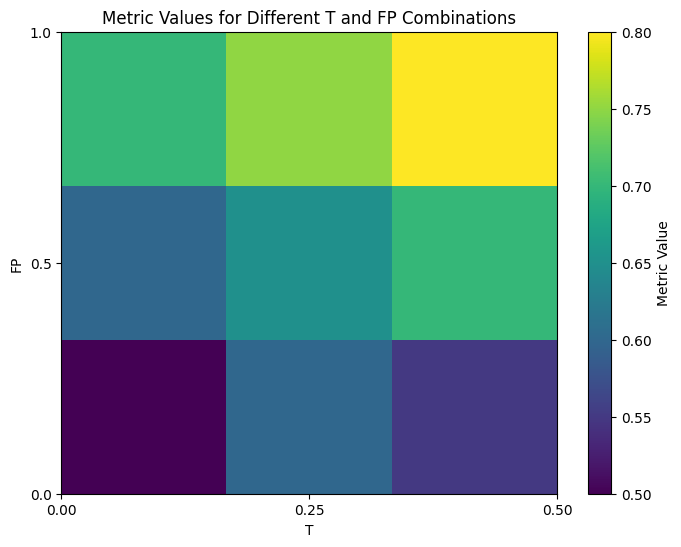

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary with experiment IDs and their corresponding metric values
experiment_results = {
    'technique1_model1_0T_0FP': 0.5,
    'technique1_model1_0T_0.5FP': 0.6,
    'technique1_model1_0T_1FP': 0.7,
    'technique1_model1_0.25T_0FP': 0.6,
    'technique1_model1_0.25T_0.5FP': 0.65,
    'technique1_model1_0.25T_1FP': 0.75,
    'technique1_model1_0.5T_0FP': 0.55,
    'technique1_model1_0.5T_0.5FP': 0.7,
    'technique1_model1_0.5T_1FP': 0.8,
}

# Extract the unique T and FP values
T = [0, 0.25, 0.5]
FP = [0, 0.5, 1]

# Create a matrix to store the metric values
metrics_matrix = np.zeros((len(FP), len(T)))

# Fill the matrix with the metric values from the experiment results
for exp_id, metric in experiment_results.items():
    # Extract T and FP values from the experiment ID
    parts = exp_id.split('_')
    T_value = float(parts[2][:-1])
    FP_value = float(parts[3][:-2])
    
    # Find the corresponding indices in the matrix
    T_idx = T.index(T_value)
    FP_idx = FP.index(FP_value)
    
    # Store the metric value in the matrix
    metrics_matrix[FP_idx, T_idx] = metric

# Plot the metrics matrix
plt.figure(figsize=(8, 6))
plt.imshow(metrics_matrix, extent=[min(T), max(T), min(FP), max(FP)], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Metric Value')
plt.xlabel('T')
plt.ylabel('FP')
plt.title('Metric Values for Different T and FP Combinations')
plt.xticks(T)
plt.yticks(FP)
plt.show()


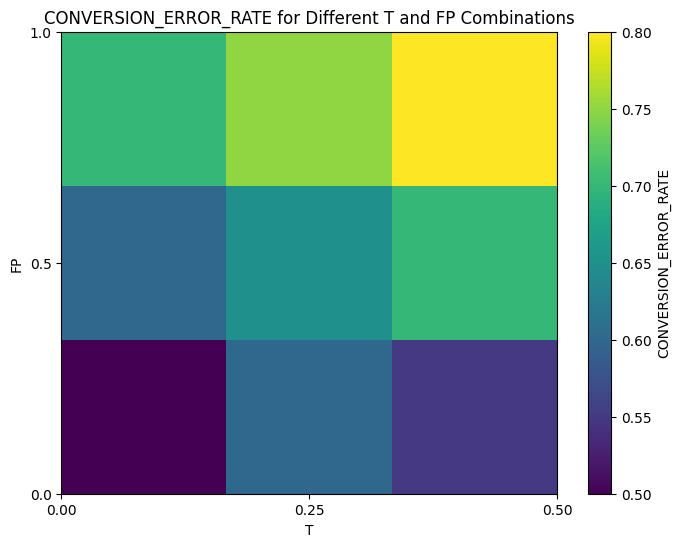

In [5]:
import matplotlib.pyplot as plt
import numpy as np

class Plotter:
    def __init__(self, errors):
        self.errors = errors

    def _plot_conversion_error_trend(self, model_name):
        # Assuming self.errors is a DataFrame with columns 'T', 'FP', and 'CONVERSION_ERROR_RATE'
        # Filter the DataFrame for the specified model_name if needed

        # Extract the unique T and FP values
        T = sorted(self.errors['T'].unique())
        FP = sorted(self.errors['FP'].unique())

        # Create a matrix to store the metric values
        metrics_matrix = np.zeros((len(FP), len(T)))

        # Fill the matrix with the metric values from the DataFrame
        for _, row in self.errors.iterrows():
            T_value = row['T']
            FP_value = row['FP']
            metric = row['CONVERSION_ERROR_RATE']

            # Find the corresponding indices in the matrix
            T_idx = T.index(T_value)
            FP_idx = FP.index(FP_value)

            # Store the metric value in the matrix
            metrics_matrix[FP_idx, T_idx] = metric

        # Plot the metrics matrix
        plt.figure(figsize=(8, 6))
        plt.imshow(metrics_matrix, extent=[min(T), max(T), min(FP), max(FP)], origin='lower', aspect='auto', cmap='viridis')
        plt.colorbar(label='CONVERSION_ERROR_RATE')
        plt.xlabel('T')
        plt.ylabel('FP')
        plt.title('CONVERSION_ERROR_RATE for Different T and FP Combinations')
        plt.xticks(T)
        plt.yticks(FP)
        plt.show()

# Example usage:
import pandas as pd

# Create a sample DataFrame
data = {
    'T': [0, 0, 0, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5],
    'FP': [0, 0.5, 1, 0, 0.5, 1, 0, 0.5, 1],
    'CONVERSION_ERROR_RATE': [0.5, 0.6, 0.7, 0.6, 0.65, 0.75, 0.55, 0.7, 0.8],
    'MODEL_NAME': ['model1'] * 9  # Assuming all belong to the same model
}
df = pd.DataFrame(data)

# Initialize the Plotter with the DataFrame
plotter = Plotter(errors=df)

# Plot the conversion error trend for 'model1'
plotter._plot_conversion_error_trend('model1')


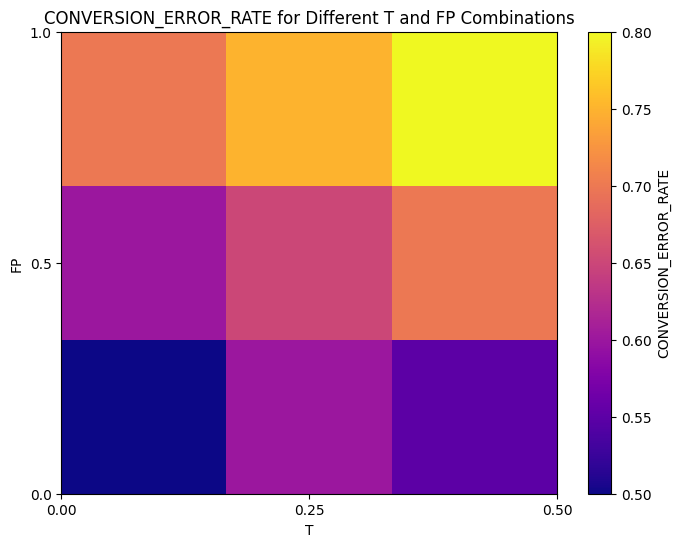

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class Plotter:
    def __init__(self, errors):
        self.errors = errors

    def _plot_conversion_error_trend(self, model_name, cmap='viridis'):
        # Assuming self.errors is a DataFrame with columns 'T', 'FP', and 'CONVERSION_ERROR_RATE'
        # Filter the DataFrame for the specified model_name if needed

        # Extract the unique T and FP values
        T = sorted(self.errors['T'].unique())
        FP = sorted(self.errors['FP'].unique())

        # Create a matrix to store the metric values
        metrics_matrix = np.zeros((len(FP), len(T)))

        # Fill the matrix with the metric values from the DataFrame
        for _, row in self.errors.iterrows():
            T_value = row['T']
            FP_value = row['FP']
            metric = row['CONVERSION_ERROR_RATE']

            # Find the corresponding indices in the matrix
            T_idx = T.index(T_value)
            FP_idx = FP.index(FP_value)

            # Store the metric value in the matrix
            metrics_matrix[FP_idx, T_idx] = metric

        # Plot the metrics matrix
        plt.figure(figsize=(8, 6))
        plt.imshow(metrics_matrix, extent=[min(T), max(T), min(FP), max(FP)], origin='lower', aspect='auto', cmap=cmap)
        plt.colorbar(label='CONVERSION_ERROR_RATE')
        plt.xlabel('T')
        plt.ylabel('FP')
        plt.title('CONVERSION_ERROR_RATE for Different T and FP Combinations')
        plt.xticks(T)
        plt.yticks(FP)
        plt.show()

# Example usage:

# Create a sample DataFrame
data = {
    'T': [0, 0, 0, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5],
    'FP': [0, 0.5, 1, 0, 0.5, 1, 0, 0.5, 1],
    'CONVERSION_ERROR_RATE': [0.5, 0.6, 0.7, 0.6, 0.65, 0.75, 0.55, 0.7, 0.8],
    'MODEL_NAME': ['model1'] * 9  # Assuming all belong to the same model
}
df = pd.DataFrame(data)

# Initialize the Plotter with the DataFrame
plotter = Plotter(errors=df)

# Plot the conversion error trend for 'model1' with a different colormap (e.g., 'plasma')
plotter._plot_conversion_error_trend('model1', cmap='plasma')


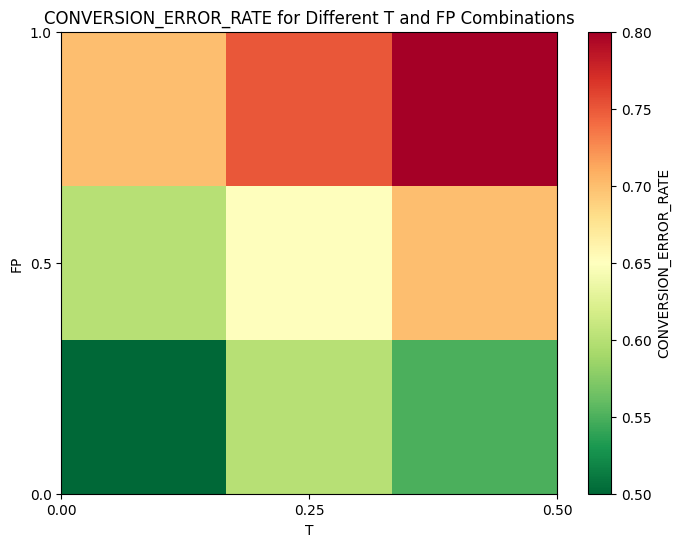

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class Plotter:
    def __init__(self, errors):
        self.errors = errors

    def _plot_conversion_error_trend(self, model_name, colormap='viridis'):
        # Assuming self.errors is a DataFrame with columns 'T', 'FP', and 'CONVERSION_ERROR_RATE'
        # Filter the DataFrame for the specified model_name if needed

        # Extract the unique T and FP values
        T = sorted(self.errors['T'].unique())
        FP = sorted(self.errors['FP'].unique())

        # Create a matrix to store the metric values
        metrics_matrix = np.zeros((len(FP), len(T)))

        # Fill the matrix with the metric values from the DataFrame
        for _, row in self.errors.iterrows():
            T_value = row['T']
            FP_value = row['FP']
            metric = row['CONVERSION_ERROR_RATE']

            # Find the corresponding indices in the matrix
            T_idx = T.index(T_value)
            FP_idx = FP.index(FP_value)

            # Store the metric value in the matrix
            metrics_matrix[FP_idx, T_idx] = metric

        # Plot the metrics matrix
        plt.figure(figsize=(8, 6))
        plt.imshow(metrics_matrix, extent=[min(T), max(T), min(FP), max(FP)], origin='lower', aspect='auto', cmap=colormap)
        plt.colorbar(label='CONVERSION_ERROR_RATE')
        plt.xlabel('T')
        plt.ylabel('FP')
        plt.title('CONVERSION_ERROR_RATE for Different T and FP Combinations')
        plt.xticks(T)
        plt.yticks(FP)
        plt.show()

# Example usage:
# Create a sample DataFrame
data = {
    'T': [0, 0, 0, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5],
    'FP': [0, 0.5, 1, 0, 0.5, 1, 0, 0.5, 1],
    'CONVERSION_ERROR_RATE': [0.5, 0.6, 0.7, 0.6, 0.65, 0.75, 0.55, 0.7, 0.8],
    'MODEL_NAME': ['model1'] * 9  # Assuming all belong to the same model
}
df = pd.DataFrame(data)

# Initialize the Plotter with the DataFrame
plotter = Plotter(errors=df)

# Plot the conversion error trend for 'model1' with a different colormap
plotter._plot_conversion_error_trend('model1', colormap='RdYlGn_r')


In [1]:
import pandas as pd
import numpy as np
pred = pd.read_pickle("C:\\Repos\\llaraspata\\HRMQuestionnaireGenerationUsingLLM\\models\\0s_gpt-35-turbo-dev_6000MT_0T_0FP\\predictions.pkl")

In [4]:
pred[["PROMPT_TOKENS", "COMPLETITION_TOKENS", "TOTAL_TOKENS"]].mean()

PROMPT_TOKENS          547.075949
COMPLETITION_TOKENS     657.56962
TOTAL_TOKENS           1204.64557
dtype: object

# Best questionnaire for UserGroup

In [2]:
import os
import pandas as pd


result_path = "C:\\Users\\lucry\\HRMQuestionnaireGenerationUsingLLM\\results"
intraqst_sim_filename = "Intraquestionnaire_Syntactic_Similarity.csv"
sem_sim_filename = "SemanticSimilarity_questionnaires.csv"
serendipity_filename = "Serendipity_Scores.csv"

intraqst_sims = pd.DataFrame()
sem_sims = pd.DataFrame()
serendipity = pd.DataFrame()



for subfolder in os.listdir(result_path):
        experiment_path = os.path.join(result_path, subfolder)
        
        if os.path.isdir(experiment_path):
            try:
                intraqst_sim_scores = pd.read_csv(os.path.join(experiment_path, intraqst_sim_filename))
                semsim_scores = pd.read_csv(os.path.join(experiment_path, sem_sim_filename))
                serendipity_scores = pd.read_csv(os.path.join(experiment_path, serendipity_filename))
                
                intraqst_sim_scores["EXPERIMENT_ID"] = [subfolder] * len(intraqst_sim_scores)
                semsim_scores["EXPERIMENT_ID"] = [subfolder] * len(semsim_scores)
                serendipity_scores["EXPERIMENT_ID"] = [subfolder] * len(serendipity_scores)

                intraqst_sims = pd.concat([intraqst_sims, intraqst_sim_scores])
                sem_sims = pd.concat([sem_sims, semsim_scores])
                serendipity = pd.concat([serendipity, serendipity_scores])
            except FileNotFoundError:
                print(f"Files not found for experiment: {subfolder}")
                continue
                          

C:\Users\lucry\AppData\Local\Temp\ipykernel_14500\2252151111.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  intraqst_sims = pd.concat([intraqst_sims, intraqst_sim_scores])
C:\Users\lucry\AppData\Local\Temp\ipykernel_14500\2252151111.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  intraqst_sims = pd.concat([intraqst_sims, intraqst_sim_scores])


Files not found for experiment: 0s_gpt-35-turbo-dev_6000MT_0T_1FP
Files not found for experiment: failures_log
Files not found for experiment: turing_test


In [3]:
intraqst_sims[intraqst_sims["ROUGE_L_F1"] >= 0.14][["EXPERIMENT_ID", "QUESTIONNAIRE_ID", "ROUGE_L_F1"]]

,EXPERIMENT_ID,QUESTIONNAIRE_ID,ROUGE_L_F1
0,0s_FULL_gpt-35-turbo-dev_6000MT_0.25T_0.5FP,1173005,0.159395
1,0s_FULL_gpt-35-turbo-dev_6000MT_0.25T_0.5FP,1213249,0.250000
2,0s_FULL_gpt-35-turbo-dev_6000MT_0.25T_0.5FP,500100043,0.386168
0,0s_FULL_gpt-35-turbo-dev_6000MT_0.25T_0FP,1146002,0.277665
1,0s_FULL_gpt-35-turbo-dev_6000MT_0.25T_0FP,1146004,0.401602
...,...,...,...
1,1s_gpt-4-dev_4000MT_0T_1FP_JSON,500100007,0.333333
3,1s_gpt-4-dev_4000MT_0T_1FP_JSON,500100023,0.224831
4,1s_gpt-4-dev_4000MT_0T_1FP_JSON,500100028,0.416469
5,1s_gpt-4-dev_4000MT_0T_1FP_JSON,500100029,0.358333


In [4]:
sem_sims[sem_sims["FINAL_SCORE_MEAN"].max() == sem_sims["FINAL_SCORE_MEAN"]][["EXPERIMENT_ID", "QUESTIONNAIRE_ID", "FINAL_SCORE_MEAN"]]

,EXPERIMENT_ID,QUESTIONNAIRE_ID,FINAL_SCORE_MEAN
40,1s_gpt-35-turbo-dev_6000MT_0.25T_0FP,500100028,0.865941


In [5]:
serendipity[serendipity["SERENDIPITY_SCORE"].max() > serendipity["SERENDIPITY_SCORE"]][["EXPERIMENT_ID", "QUESTIONNAIRE_ID", "SERENDIPITY_SCORE"]].sort_values(by="SERENDIPITY_SCORE", ascending=False).head(20)

,EXPERIMENT_ID,QUESTIONNAIRE_ID,SERENDIPITY_SCORE
9,0s_FULL_gpt-35-turbo-dev_6000MT_0T_0FP,5100002,1.200000
39,1s_FULL_gpt-4-dev_4000MT_0T_0FP_JSON,500100027,1.200000
38,1s_FULL_gpt-35-turbo-dev_6000MT_0T_0FP,500100027,1.200000
19,1s_FULL_gpt-4-dev_4000MT_0.5T_0FP_JSON,500100007,1.166667
8,1s_FULL_gpt-4-dev_4000MT_0.25T_0.5FP_JSON,5100002,1.100000
39,1s_FULL_gpt-35-turbo-dev_6000MT_0.5T_0FP,500100027,1.100000
49,1s_FULL_gpt-4-dev_4000MT_0.25T_0FP_JSON,500100037,1.100000
9,1s_FULL_gpt-4-dev_4000MT_0.5T_0FP_JSON,5100002,1.100000
38,1s_FULL_gpt-35-turbo-dev_6000MT_0.25T_0FP,500100027,1.100000
9,1s_FULL_gpt-35-turbo-dev_6000MT_0T_0FP,5100002,1.100000


In [6]:

serendipity[serendipity["SERENDIPITY_SCORE"] > 1][["EXPERIMENT_ID", "QUESTIONNAIRE_ID", "SERENDIPITY_SCORE"]]

,EXPERIMENT_ID,QUESTIONNAIRE_ID,SERENDIPITY_SCORE
9,0s_FULL_gpt-35-turbo-dev_6000MT_0.25T_0FP,5100002,1.100000
39,0s_FULL_gpt-35-turbo-dev_6000MT_0.25T_0FP,500100027,1.300000
39,0s_FULL_gpt-35-turbo-dev_6000MT_0.5T_0FP,500100027,1.100000
9,0s_FULL_gpt-35-turbo-dev_6000MT_0T_0FP,5100002,1.200000
39,0s_FULL_gpt-35-turbo-dev_6000MT_0T_0FP,500100027,1.300000
19,0s_FULL_gpt-4-dev_4000MT_0.5T_0FP_JSON,500100007,1.083333
19,0s_FULL_gpt-4-dev_4000MT_0T_0FP_JSON,500100007,1.083333
38,1s_FULL_gpt-35-turbo-dev_6000MT_0.25T_0FP,500100027,1.100000
39,1s_FULL_gpt-35-turbo-dev_6000MT_0.5T_0FP,500100027,1.100000
9,1s_FULL_gpt-35-turbo-dev_6000MT_0T_0FP,5100002,1.100000


In [8]:
serendipity[serendipity["EXPERIMENT_ID"] == "1s_gpt-4-dev_4000MT_0.5T_0FP_JSON"]

,QUESTIONNAIRE_ID,SERENDIPITY_SCORE,EXPERIMENT_ID
0,1146002,1.000000,1s_gpt-4-dev_4000MT_0.5T_0FP_JSON
1,1146004,0.875000,1s_gpt-4-dev_4000MT_0.5T_0FP_JSON
2,1173001,0.875000,1s_gpt-4-dev_4000MT_0.5T_0FP_JSON
3,1173002,0.666667,1s_gpt-4-dev_4000MT_0.5T_0FP_JSON
4,1173003,0.750000,1s_gpt-4-dev_4000MT_0.5T_0FP_JSON
...,...,...,...
74,500100062,0.777778,1s_gpt-4-dev_4000MT_0.5T_0FP_JSON
75,500100063,1.000000,1s_gpt-4-dev_4000MT_0.5T_0FP_JSON
76,500100064,0.900000,1s_gpt-4-dev_4000MT_0.5T_0FP_JSON
77,500100065,0.900000,1s_gpt-4-dev_4000MT_0.5T_0FP_JSON


Similarity between question How satisfied are you with your current job? and question Do you feel that your job is challenging and stimulating?: 0.6155951897291443

Similarity between question How satisfied are you with your current job? and question Do you feel that your job provides opportunities for growth and development?: 0.53094371948266

Similarity between question How satisfied are you with your current job? and question Do you feel that your job is aligned with your career goals?: 0.5715414206690057

Similarity between question How satisfied are you with your current job? and question Do you feel that your job provides a good work-life balance?: 0.5751838538058706

Similarity between question How satisfied are you with your current job? and question Do you feel that your job provides adequate compensation?: 0.6290219140523348

Similarity between question How satisfied are you with your current job? and question Do you feel that your job provides adequate benefits?: 0.577638862746251

Similarity between question How satisfied are you with your current job? and question Do you feel that your job provides adequate recognition and rewards?: 0.5996765169006328

Similarity between question How satisfied are you with your current job? and question Do you feel that your job provides a sense of purpose and meaning?: 0.541601219679646

Similarity between question How satisfied are you with your current job? and question Do you feel that your job provides a sense of accomplishment?: 0.5884192605163171

Similarity between question How satisfied are you with your current job? and question Do you feel that your job provides a sense of autonomy and control?: 0.5233293432382013

Similarity between question How satisfied are you with your current job? and question Do you feel that your job provides a sense of camaraderie and social support?: 0.4700328038643132

Similarity between question How satisfied are you with your current job? and question Do you feel that your job provides a sense of challenge and growth?: 0.5743924395431407

Similarity between question How satisfied are you with your current job? and question Do you feel that your job provides a sense of work-life balance?: 0.5729692839517293

Similarity between question How satisfied are you with your current job? and question Do you feel that your job provides a sense of recognition and rewards?: 0.5760108796650212

Similarity between question How satisfied are you with your current job? and question Do you feel that your job provides a sense of purpose and meaning?: 0.541601219679646

Similarity between question How satisfied are you with your current job? and question Do you feel that your job provides a sense of accomplishment?: 0.5884192605163171

Similarity between question Do you feel that your job is challenging and stimulating? and question Do you feel that your job provides opportunities for growth and development?: 0.6584242220459755      

Similarity between question Do you feel that your job is challenging and stimulating? and question Do you feel that your job is aligned with your career goals?: 0.5806949524787697

Similarity between question Do you feel that your job is challenging and stimulating? and question Do you feel that your job provides a good work-life balance?: 0.6133551160708817

Similarity between question Do you feel that your job is challenging and stimulating? and question Do you feel that your job provides adequate compensation?: 0.5861033332756237

Similarity between question Do you feel that your job is challenging and stimulating? and question Do you feel that your job provides adequate benefits?: 0.5516478021004971

Similarity between question Do you feel that your job is challenging and stimulating? and question Do you feel that your job provides adequate recognition and rewards?: 0.6128351596443468

Similarity between question Do you feel that your job is challenging and stimulating? and question Do you feel that your job provides a sense of purpose and meaning?: 0.6432075239567873

Similarity between question Do you feel that your job is challenging and stimulating? and question Do you feel that your job provides a sense of accomplishment?: 0.6409247888212517

Similarity between question Do you feel that your job is challenging and stimulating? and question Do you feel that your job provides a sense of autonomy and control?: 0.5967951835533924

Similarity between question Do you feel that your job is challenging and stimulating? and question Do you feel that your job provides a sense of camaraderie and social support?: 0.5577095881649576     

Similarity between question Do you feel that your job is challenging and stimulating? and question Do you feel that your job provides a sense of challenge and growth?: 0.8072976283259765

Similarity between question Do you feel that your job is challenging and stimulating? and question Do you feel that your job provides a sense of work-life balance?: 0.6212459969624196

Similarity between question Do you feel that your job is challenging and stimulating? and question Do you feel that your job provides a sense of recognition and rewards?: 0.6296896001418453

Similarity between question Do you feel that your job is challenging and stimulating? and question Do you feel that your job provides a sense of purpose and meaning?: 0.6432075239567873

Similarity between question Do you feel that your job is challenging and stimulating? and question Do you feel that your job provides a sense of accomplishment?: 0.6409247888212517

Similarity between question Do you feel that your job provides opportunities for growth and development? and question Do you feel that your job is aligned with your career goals?: 0.6033578245793093   

Similarity between question Do you feel that your job provides opportunities for growth and development? and question Do you feel that your job provides a good work-life balance?: 0.6032564144643552   

Similarity between question Do you feel that your job provides opportunities for growth and development? and question Do you feel that your job provides adequate compensation?: 0.5895583428886784      

Similarity between question Do you feel that your job provides opportunities for growth and development? and question Do you feel that your job provides adequate benefits?: 0.6005598842919786

Similarity between question Do you feel that your job provides opportunities for growth and development? and question Do you feel that your job provides adequate recognition and rewards?: 0.637513087288494

Similarity between question Do you feel that your job provides opportunities for growth and development? and question Do you feel that your job provides a sense of purpose and meaning?: 0.6342877727652791

Similarity between question Do you feel that your job provides opportunities for growth and development? and question Do you feel that your job provides a sense of accomplishment?: 0.6228066585601675  

Similarity between question Do you feel that your job provides opportunities for growth and development? and question Do you feel that your job provides a sense of autonomy and control?: 0.6073727103111192

Similarity between question Do you feel that your job provides opportunities for growth and development? and question Do you feel that your job provides a sense of camaraderie and social support?: 0.5799510414160265

Similarity between question Do you feel that your job provides opportunities for growth and development? and question Do you feel that your job provides a sense of challenge and growth?: 0.8453786476581561

Similarity between question Do you feel that your job provides opportunities for growth and development? and question Do you feel that your job provides a sense of work-life balance?: 0.6138466877051447

Similarity between question Do you feel that your job provides opportunities for growth and development? and question Do you feel that your job provides a sense of recognition and rewards?: 0.6446989605159226

Similarity between question Do you feel that your job provides opportunities for growth and development? and question Do you feel that your job provides a sense of purpose and meaning?: 0.6342877727652791

Similarity between question Do you feel that your job provides opportunities for growth and development? and question Do you feel that your job provides a sense of accomplishment?: 0.6228066585601675  

Similarity between question Do you feel that your job is aligned with your career goals? and question Do you feel that your job provides a good work-life balance?: 0.5923372003581939

Similarity between question Do you feel that your job is aligned with your career goals? and question Do you feel that your job provides adequate compensation?: 0.5531488929875115

Similarity between question Do you feel that your job is aligned with your career goals? and question Do you feel that your job provides adequate benefits?: 0.5150738139133222

Similarity between question Do you feel that your job is aligned with your career goals? and question Do you feel that your job provides adequate recognition and rewards?: 0.5636681749322872

Similarity between question Do you feel that your job is aligned with your career goals? and question Do you feel that your job provides a sense of purpose and meaning?: 0.6113503404468272

Similarity between question Do you feel that your job is aligned with your career goals? and question Do you feel that your job provides a sense of accomplishment?: 0.5927848972193515

Similarity between question Do you feel that your job is aligned with your career goals? and question Do you feel that your job provides a sense of autonomy and control?: 0.5170585537454404

Similarity between question Do you feel that your job is aligned with your career goals? and question Do you feel that your job provides a sense of camaraderie and social support?: 0.4815009374872984  

Similarity between question Do you feel that your job is aligned with your career goals? and question Do you feel that your job provides a sense of challenge and growth?: 0.6065949068609424

Similarity between question Do you feel that your job is aligned with your career goals? and question Do you feel that your job provides a sense of work-life balance?: 0.6008812321645245

Similarity between question Do you feel that your job is aligned with your career goals? and question Do you feel that your job provides a sense of recognition and rewards?: 0.574035814936242

Similarity between question Do you feel that your job is aligned with your career goals? and question Do you feel that your job provides a sense of purpose and meaning?: 0.6113503404468272

Similarity between question Do you feel that your job is aligned with your career goals? and question Do you feel that your job provides a sense of accomplishment?: 0.5927848972193515

Similarity between question Do you feel that your job provides a good work-life balance? and question Do you feel that your job provides adequate compensation?: 0.6617423245407483

Similarity between question Do you feel that your job provides a good work-life balance? and question Do you feel that your job provides adequate benefits?: 0.667931473197996

Similarity between question Do you feel that your job provides a good work-life balance? and question Do you feel that your job provides adequate recognition and rewards?: 0.6234378045265514

Similarity between question Do you feel that your job provides a good work-life balance? and question Do you feel that your job provides a sense of purpose and meaning?: 0.6351708721153051

Similarity between question Do you feel that your job provides a good work-life balance? and question Do you feel that your job provides a sense of accomplishment?: 0.6326475052539955

Similarity between question Do you feel that your job provides a good work-life balance? and question Do you feel that your job provides a sense of autonomy and control?: 0.6207300106879352

Similarity between question Do you feel that your job provides a good work-life balance? and question Do you feel that your job provides a sense of camaraderie and social support?: 0.6055215239532444  

Similarity between question Do you feel that your job provides a good work-life balance? and question Do you feel that your job provides a sense of challenge and growth?: 0.6186048929588692

Similarity between question Do you feel that your job provides a good work-life balance? and question Do you feel that your job provides a sense of work-life balance?: 0.9428977428224766

Similarity between question Do you feel that your job provides a good work-life balance? and question Do you feel that your job provides a sense of recognition and rewards?: 0.6121212407675216

Similarity between question Do you feel that your job provides a good work-life balance? and question Do you feel that your job provides a sense of purpose and meaning?: 0.6351708721153051

Similarity between question Do you feel that your job provides a good work-life balance? and question Do you feel that your job provides a sense of accomplishment?: 0.6326475052539955

Similarity between question Do you feel that your job provides adequate compensation? and question Do you feel that your job provides adequate benefits?: 0.8219797015890453

Similarity between question Do you feel that your job provides adequate compensation? and question Do you feel that your job provides adequate recognition and rewards?: 0.8078294631872667

Similarity between question Do you feel that your job provides adequate compensation? and question Do you feel that your job provides a sense of purpose and meaning?: 0.6048291805573278

Similarity between question Do you feel that your job provides adequate compensation? and question Do you feel that your job provides a sense of accomplishment?: 0.6562037872717965

Similarity between question Do you feel that your job provides adequate compensation? and question Do you feel that your job provides a sense of autonomy and control?: 0.5514735067909201

Similarity between question Do you feel that your job provides adequate compensation? and question Do you feel that your job provides a sense of camaraderie and social support?: 0.5302528479825622

Similarity between question Do you feel that your job provides adequate compensation? and question Do you feel that your job provides a sense of challenge and growth?: 0.6062528649879907

Similarity between question Do you feel that your job provides adequate compensation? and question Do you feel that your job provides a sense of work-life balance?: 0.6490087927913879

Similarity between question Do you feel that your job provides adequate compensation? and question Do you feel that your job provides a sense of recognition and rewards?: 0.6975776452598825

Similarity between question Do you feel that your job provides adequate compensation? and question Do you feel that your job provides a sense of purpose and meaning?: 0.6048291805573278

Similarity between question Do you feel that your job provides adequate compensation? and question Do you feel that your job provides a sense of accomplishment?: 0.6562037872717965

Similarity between question Do you feel that your job provides adequate benefits? and question Do you feel that your job provides adequate recognition and rewards?: 0.7297860213695804

Similarity between question Do you feel that your job provides adequate benefits? and question Do you feel that your job provides a sense of purpose and meaning?: 0.6088702115828761

Similarity between question Do you feel that your job provides adequate benefits? and question Do you feel that your job provides a sense of accomplishment?: 0.614569093948967

Similarity between question Do you feel that your job provides adequate benefits? and question Do you feel that your job provides a sense of autonomy and control?: 0.5592326605380271

Similarity between question Do you feel that your job provides adequate benefits? and question Do you feel that your job provides a sense of camaraderie and social support?: 0.5835693725298466

Similarity between question Do you feel that your job provides adequate benefits? and question Do you feel that your job provides a sense of challenge and growth?: 0.6006727533503342

Similarity between question Do you feel that your job provides adequate benefits? and question Do you feel that your job provides a sense of work-life balance?: 0.6542356389968949

Similarity between question Do you feel that your job provides adequate benefits? and question Do you feel that your job provides a sense of recognition and rewards?: 0.6422697918060282

Similarity between question Do you feel that your job provides adequate benefits? and question Do you feel that your job provides a sense of purpose and meaning?: 0.6088702115828761

Similarity between question Do you feel that your job provides adequate benefits? and question Do you feel that your job provides a sense of accomplishment?: 0.614569093948967

Similarity between question Do you feel that your job provides adequate recognition and rewards? and question Do you feel that your job provides a sense of purpose and meaning?: 0.6101115001308082     

Similarity between question Do you feel that your job provides adequate recognition and rewards? and question Do you feel that your job provides a sense of accomplishment?: 0.6839313224479264

Similarity between question Do you feel that your job provides adequate recognition and rewards? and question Do you feel that your job provides a sense of autonomy and control?: 0.581247156041567     

Similarity between question Do you feel that your job provides adequate recognition and rewards? and question Do you feel that your job provides a sense of camaraderie and social support?: 0.58850051692463

Similarity between question Do you feel that your job provides adequate recognition and rewards? and question Do you feel that your job provides a sense of challenge and growth?: 0.6529448110713065    

Similarity between question Do you feel that your job provides adequate recognition and rewards? and question Do you feel that your job provides a sense of work-life balance?: 0.6280278199727324       

Similarity between question Do you feel that your job provides adequate recognition and rewards? and question Do you feel that your job provides a sense of recognition and rewards?: 0.9175703839973848 

Similarity between question Do you feel that your job provides adequate recognition and rewards? and question Do you feel that your job provides a sense of purpose and meaning?: 0.6101115001308082     

Similarity between question Do you feel that your job provides adequate recognition and rewards? and question Do you feel that your job provides a sense of accomplishment?: 0.6839313224479264

Similarity between question Do you feel that your job provides a sense of purpose and meaning? and question Do you feel that your job provides a sense of accomplishment?: 0.7953547899672735

Similarity between question Do you feel that your job provides a sense of purpose and meaning? and question Do you feel that your job provides a sense of autonomy and control?: 0.6423280773428575      

Similarity between question Do you feel that your job provides a sense of purpose and meaning? and question Do you feel that your job provides a sense of camaraderie and social support?: 0.664092108677769

Similarity between question Do you feel that your job provides a sense of purpose and meaning? and question Do you feel that your job provides a sense of challenge and growth?: 0.7226943440373016      

Similarity between question Do you feel that your job provides a sense of purpose and meaning? and question Do you feel that your job provides a sense of work-life balance?: 0.7085931676114563

Similarity between question Do you feel that your job provides a sense of purpose and meaning? and question Do you feel that your job provides a sense of recognition and rewards?: 0.7122756894744287   

Similarity between question Do you feel that your job provides a sense of purpose and meaning? and question Do you feel that your job provides a sense of purpose and meaning?: 0.9999999999999966       
Removed duplicate question: Do you feel that your job provides a sense of purpose and meaning?

Similarity between question Do you feel that your job provides a sense of purpose and meaning? and question Do you feel that your job provides a sense of accomplishment?: 0.7953547899672735

Similarity between question Do you feel that your job provides a sense of accomplishment? and question Do you feel that your job provides a sense of autonomy and control?: 0.654457789548756

Similarity between question Do you feel that your job provides a sense of accomplishment? and question Do you feel that your job provides a sense of camaraderie and social support?: 0.6369581740324719 

Similarity between question Do you feel that your job provides a sense of accomplishment? and question Do you feel that your job provides a sense of challenge and growth?: 0.7336184775085686

Similarity between question Do you feel that your job provides a sense of accomplishment? and question Do you feel that your job provides a sense of work-life balance?: 0.7036380049964924

Similarity between question Do you feel that your job provides a sense of accomplishment? and question Do you feel that your job provides a sense of recognition and rewards?: 0.7735697975075875        

Similarity between question Do you feel that your job provides a sense of accomplishment? and question Do you feel that your job provides a sense of purpose and meaning?: 0.7953547899672735

Similarity between question Do you feel that your job provides a sense of accomplishment? and question Do you feel that your job provides a sense of accomplishment?: 0.9999999999999986
Removed duplicate question: Do you feel that your job provides a sense of accomplishment?

Similarity between question Do you feel that your job provides a sense of autonomy and control? and question Do you feel that your job provides a sense of camaraderie and social support?: 0.6014010046213638

Similarity between question Do you feel that your job provides a sense of autonomy and control? and question Do you feel that your job provides a sense of challenge and growth?: 0.6537681786774485     

Similarity between question Do you feel that your job provides a sense of autonomy and control? and question Do you feel that your job provides a sense of work-life balance?: 0.6762026645608941        

Similarity between question Do you feel that your job provides a sense of autonomy and control? and question Do you feel that your job provides a sense of recognition and rewards?: 0.6458181899916126  

Similarity between question Do you feel that your job provides a sense of autonomy and control? and question Do you feel that your job provides a sense of purpose and meaning?: 0.6423482305070856      

Similarity between question Do you feel that your job provides a sense of autonomy and control? and question Do you feel that your job provides a sense of accomplishment?: 0.6544870816352553

Similarity between question Do you feel that your job provides a sense of camaraderie and social support? and question Do you feel that your job provides a sense of challenge and growth?: 0.6120014743632586

Similarity between question Do you feel that your job provides a sense of camaraderie and social support? and question Do you feel that your job provides a sense of work-life balance?: 0.6536570523086336

Similarity between question Do you feel that your job provides a sense of camaraderie and social support? and question Do you feel that your job provides a sense of recognition and rewards?: 0.6591990923846307

Similarity between question Do you feel that your job provides a sense of camaraderie and social support? and question Do you feel that your job provides a sense of purpose and meaning?: 0.664092108677769

Similarity between question Do you feel that your job provides a sense of camaraderie and social support? and question Do you feel that your job provides a sense of accomplishment?: 0.6369581740324719 

Similarity between question Do you feel that your job provides a sense of challenge and growth? and question Do you feel that your job provides a sense of work-life balance?: 0.671670739727676

Similarity between question Do you feel that your job provides a sense of challenge and growth? and question Do you feel that your job provides a sense of recognition and rewards?: 0.7046517562036596  

Similarity between question Do you feel that your job provides a sense of challenge and growth? and question Do you feel that your job provides a sense of purpose and meaning?: 0.7226943440373016      

Similarity between question Do you feel that your job provides a sense of challenge and growth? and question Do you feel that your job provides a sense of accomplishment?: 0.7336184775085686

Similarity between question Do you feel that your job provides a sense of work-life balance? and question Do you feel that your job provides a sense of recognition and rewards?: 0.6708683436393182     

Similarity between question Do you feel that your job provides a sense of work-life balance? and question Do you feel that your job provides a sense of purpose and meaning?: 0.7085931676114563

Similarity between question Do you feel that your job provides a sense of work-life balance? and question Do you feel that your job provides a sense of accomplishment?: 0.7036380049964924

Similarity between question Do you feel that your job provides a sense of recognition and rewards? and question Do you feel that your job provides a sense of purpose and meaning?: 0.7122756894744287   

Similarity between question Do you feel that your job provides a sense of recognition and rewards? and question Do you feel that your job provides a sense of accomplishment?: 0.7735697975075875        

Similarity between question Do you feel that your job provides a sense of purpose and meaning? and question Do you feel that your job provides a sense of accomplishment?: 0.7953547899672735